In [22]:
import pandas as pd 
import numpy as np

In [23]:
marketshare =pd.read_excel("/Users/jessicakammann/Desktop/Research /Cellphone Market Share by Quarter.xlsx")

marketshare["Samsung_Research"] = marketshare["Samsung_Research"].astype(int)
marketshare.dtypes



Year                      object
Android                  float64
Apple                    float64
Apple_investment           int64
Samsung_Research           int64
android_price_average      int64
iphone_prices              int64
dtype: object

In [24]:
#https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm
import statsmodels.formula.api as smf


Regression Model for Android versus Apple Investments 

In [25]:
# Fit regression model (using the natural log of one of the regressors)
#Linear Regression for Android 
results = smf.ols('Android ~ + iphone_prices + android_price_average + Samsung_Research + Apple_investment ', data=marketshare).fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                Android   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     395.8
Date:                Mon, 14 Apr 2025   Prob (F-statistic):           1.03e-37
Time:                        15:29:53   Log-Likelihood:                -145.08
No. Observations:                  56   AIC:                             300.2
Df Residuals:                      51   BIC:                             310.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               109.81

#R-squared --adjusted Rsquared --.932 , 93% can be explained by these four variables 
#look at P variable, alot auto correlation, everything is correlated with inflation, everything goes bigger overtime, maybe need to adjust for adjust
# leg variable 
#divide by 100 million market research 
#how do we do we do the payoff matrix 

Regression Model Apple Versus Android

In [26]:
# Fit regression model (using the natural log of one of the regressors)
#Linear Regression for Apple 
results = smf.ols('Apple ~ + iphone_prices + android_price_average + Samsung_Research + Apple_investment ', data=marketshare).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Apple   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     32.67
Date:                Mon, 14 Apr 2025   Prob (F-statistic):           1.65e-13
Time:                        15:29:53   Log-Likelihood:                -110.49
No. Observations:                  56   AIC:                             231.0
Df Residuals:                      51   BIC:                             241.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 9.68

In [27]:
#transfer market share to coefficient

#rate is the matrix times 

———————————
#compete the market share, small network , apple one, andorid , price 

#neuron here each one is an input, and combine them into 4 intermiate nodes 

#final output percentage of market share

#—study difference 4 inputs 

———————————————————————
#market share, 

#predict , different models , use different regression, 
#how to predict the market share 
#maybe linear is not ideal 
#different — use last percent of data to predict 

#alternative way ———
#build a predictor in a different way 


#Sarima model
#

SyntaxError: invalid character '—' (U+2014) (3709756045.py, line 5)

In [28]:
# Fit regression model (using the natural log of one of the regressors) Regression 3 
#Linear Regression for Apple without Samsung
results = smf.ols('Apple ~ + iphone_prices + Apple_investment ', data=marketshare).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Apple   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     38.31
Date:                Mon, 14 Apr 2025   Prob (F-statistic):           5.10e-11
Time:                        15:30:03   Log-Likelihood:                -121.02
No. Observations:                  56   AIC:                             248.0
Df Residuals:                      53   BIC:                             254.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           21.8663      0.609  

In [ ]:
# Fit regression model (using the natural log of one of the regressors)
#Linear Regression for Android without Apple
results = smf.ols('Android ~ + android_price_average + Samsung_Research ', data=marketshare).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Android   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     147.3
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           2.27e-22
Time:                        17:37:17   Log-Likelihood:                -189.50
No. Observations:                  56   AIC:                             385.0
Df Residuals:                      53   BIC:                             391.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               100.02

In [29]:
#Linear Regression , Decision Tree, Random Forest, Neural Network
#for Android
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

df=pd.DataFrame(marketshare)

X = df [['Apple', 'Apple_investment', 'Samsung_Research', 'android_price_average', 'iphone_prices']]
Y= df ['Android']

#Split data into training and testing sets
X_train = X.iloc[0:40,:]
X_test = X.iloc[40:,:]
y_train = Y.iloc[0:40]
y_test = Y.iloc[40:]



model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = model.score(X_test, y_test)
print(f"R^2 Score: {r2}")

#Time Series models--- look at those 


Mean Squared Error: 1.6168790248775349
R^2 Score: -0.5999025588198097


In [30]:
#Linear Regression , Decision Tree, Random Forest, Neural Network
#for Android
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

df=pd.DataFrame(marketshare)

X = df [['Android', 'Apple_investment', 'Samsung_Research', 'android_price_average', 'iphone_prices']]
Y= df ['Apple']

#Split data into training and testing sets
X_train = X.iloc[0:40,:]
X_test = X.iloc[40:,:]
y_train = Y.iloc[0:40]
y_test = Y.iloc[40:]



model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = model.score(X_test, y_test)
print(f"R^2 Score: {r2}")


Mean Squared Error: 3.212872485624951
R^2 Score: -2.343500163700268


/Users/jessicakammann/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/jessicakammann/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/jessicakammann/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:     market_share_apple   No. Observations:                   56
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -98.644
Date:                Mon, 14 Apr 2025   AIC                            203.288
Time:                        15:58:39   BIC                            209.310
Sample:                    01-01-2011   HQIC                           205.617
                         - 10-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4367      0.676      0.646      0.519      -0.889       1.763
ma.L1         -0.6026      0.616     -0.979      0.328      -1.809       0.604
sigma2         2.1133      0.364      5.806      0.0

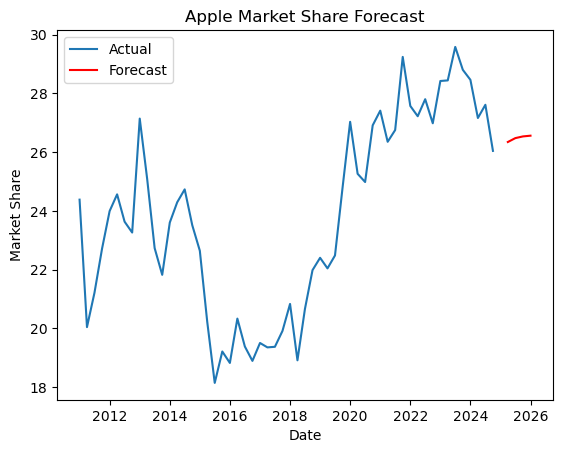

In [ ]:
#ARIMA model test if the 
#Apple 
#How do I add the rest of the constraints to this model?

data = { 'date':['2011-Q1', '2011-Q2', '2011-Q3', '2011-Q4', '2012-Q1', '2012-Q2', '2012-Q3', '2012-Q4', '2013-Q1', '2013-Q2', '2013-Q3', '2013-Q4', '2014-Q1', '2014-Q2', '2014-Q3', '2014-Q4', '2015-Q1', '2015-Q2', '2015-Q3', '2015-Q4', '2016-Q1', '2016-Q2', '2016-Q3', '2016-Q4', '2017-Q1', '2017-Q2', '2017-Q3', '2017-Q4', '2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4',' 2019-Q1','2019-Q2','2019-Q3','2019-Q4','2020- Q1',' 2020- Q2',' 2020- Q3',' 2020- Q4',' 2021- Q1',' 2021- Q2',' 2021- Q3',' 2021- Q4',' 2022- Q1',' 2022- Q2',' 2022- Q3',' 2022- Q4',' 2023- Q1',' 2023- Q2',' 2023- Q3',' 2023- Q4',' 2024- Q1',' 2024- Q2',' 2024- Q3',' 2024- Q4'],
         'market_share_apple':['24.38','20.04','21.21','22.71','23.99','24.56','23.63','23.26','27.14','25.09','22.73','21.82','23.6','24.29','24.73','23.51','22.64','20.22','18.14','19.21','18.82','20.33','19.38','18.89','19.5','19.35','19.37','19.91','20.83','18.91','20.66','21.98','22.4','22.04','22.48','24.79','27.03','25.26','24.98','26.91','27.41','26.35','26.75','29.24','27.57','27.22','27.8','26.98','28.42','28.44','29.58','28.8','28.46','27.16','27.61','26.04'],
         'market_share_android': ['15.82','17.92','20.9','21.83','23.61','25.07','29.25','33.19','37.23','37.93','39.82','42.99','48.26','52.98','55.7','59.15','61.94','63.75','66.77','65.9','68.04','68.39','69.68','71.97','71.61','72.89','73.52','73.54','74.24','76.99','76.61','75.16','75.33','76.03','76.24','74.13','72.26','74.14','74.44','72.48','71.83','72.83','72.44','70.01','71.7','72.12','71.55','72.37','70.88','70.79','69.74','70.48','70.78','72.17','71.84','73.49'],
         'Apple_investment':['581','628','645','758','841','876','628','906','1,010','1,119','1,178','1,168','1,330','1,422','1,603','1,686','1,895','1,918','2,034','2,220','2,404','2,511','2,560','2,570','2,871','2,776','2,937','2,997','3407','3378','3701','3750','3948','4257','4110','4451','4565','4758','4978','5163','5262','5717','5772','6306','6387','6797','6761','7709','7457','7442','7307',' $7,696 ',' $7,903',' $8,006',' $7,765',' $8,268'],
         'Samsung_Research': ['16.14','17.39','16.75','18.85','18.8','19.77','20.58','20.53','22.92','24.45','25.17','25.96','25.28','25.63','22.92735','25.16807','24.05','23.0894','23.55','23.838708','24.6','24.19','24.19','24.39','25.974546','27.352506','28.799364','30.521814','29.074956','30.848426','35.18','36.102552','33.76002','34.10451','35.344674','33.7241544','36.929328','35.964756','36.584838','35.964756','37.480512','37.067124','35.206878','44.577006','40.787616','43.06125','43.199046','44.545946','45.334884','49.656','48.297498','52.01799','53.878236','49.60656','48.297498','51.66735'],
         'android_price_average': ['380,','380','380','380','380','380','380','380','380','380','380','380','380','380','320','320','320','276','276','276','276','254','254','254','254','232','232','232','232','220','220','220','220','235','235','235','235','254','254','254','254','270','270','270','270','292','292','292','292','296','296','296','296','300','300','300','300','305','305','305','305'],
         'iphone_prices': ['199','199','199','199','199','199','199','199','99','99','99','99','249','249','249','249','249','249','249','249','606','606','606','606','832','832','832','832','949','949','949','949','933','933','933','933','999','999','999','999','899','899','899','899','949','949','949','949','974','974','974','974','974','974','974','974']

    
}
# Strip leading/trailing spaces from 'date' strings
data['date'] = [d.strip().replace(' ', '') for d in data['date']]


# Convert 'date' to datetime by parsing year and quarter
def parse_quarter(date_str):
    year, quarter = date_str.split('-')
    quarter_start_month = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}
    return f"{year}-{quarter_start_month[quarter]}-01"

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'].apply(parse_quarter))
df.set_index('date', inplace=True)

#Convert market share to float 
df['market_share_apple'] = df['market_share_apple'].astype(float)
Y= df['market_share_apple']
X= df[['Apple_investment', 'Samsung_Research', 'android_price_average', 'iphone_prices', 'date']]

#Split data into training and testing sets
X_train = X.iloc[0:40,:]
X_test = X.iloc[40:,:]
y_train = Y.iloc[0:40]
y_test = Y.iloc[40:]

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y_train, X_train, order=(1, 1, 0))


model_fit = model.fit()
print(model_fit.summary())

# Forecast the next 4 quarters
forecast = model_fit.forecast(steps=len(X_test), exogenous=X_test)
forecast.index = X_test.date

# Create a datetime index for the forecast
forecast_index = pd.date_range(start=df.index[-1], periods=5, freq='Q')[1:]  # Generate future dates

# Plot the data
import matplotlib.pyplot as plt
plt.plot(df.index, df['market_share_apple'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Market Share')
plt.title('Apple Market Share Forecast')
plt.legend()
plt.show()
   
# Root Squared Error
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, forecast))
print(f"Root Mean Squared Error: {rmse}")
# Mean Average Percentage Error
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, forecast)
print(f"Mean Absolute Percentage Error: {mape}")

#stationarity == not stationary 
#might want to do -- play with the 1,1,1 ---
# look at what is seasonal order is
#looks back and see what happened before, and uses that to predict

In [ ]:
#will tell me automatically what tthe best parameters are based of the grid search
from pmdarima import auto_arima

model = auto_arima(y_train, X_train seasonal=False, stepwise=True, suppress_warnings=True)
print(model.summary())

Compare AIC between one model versus the other, AIC is way to comparing models between 


Train test split
